<a href="https://colab.research.google.com/github/adishukla2009/PGP-ML-Course/blob/Applied-Stats-Project/Applied_Stats_Aditya_Shukla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis - Insurance Dataset**
The Dataset at hand is the insurance charges data for 1338 people with 7 features namely 


1.   Age - age of primary beneficiary
2.   Sex - insurance contractor gender, female, male
3.   Body mass index( BMI) -providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the
4.   Children - Number of children covered by health insurance / Number of dependents
5.   Smoker - Smoking
6.    Region - the beneficiary's residential area in the US, northeast, southeast, southwest,
northwest.
7.   Charges - Individual medical costs billed by health insurance.

Of the 7 features mentioned above - age, bmi, children and charges are numerical and Sex,Region and Smoker are categorical


# Objective
The Objective of this exercise is to perform exploratort data analysis and analyze the distribution of various features through appropriate plotting techniques in Python. 
Also, try to find the patterns and statistically showcase relationship between features wherever required 

Leraning outcomes from the exercise would be as follows

*   Exploratory Data Analysis
*   Practicing statistics using Python
*   Hypothesis testing

#Step 1 - Import the necessary libraries

Here i am importing libraries like - Numpy and Pandas to help with the data handling , Matplotlib to help with the plotting of data and scikit learn for Statistics related calculation

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power

# Step 2 - Read the data as DataFrame

Here I have also used the Head function to look at the first five rows of the dataset

In [3]:
url = 'https://raw.githubusercontent.com/adishukla2009/PGP-ML-Course/Applied-Stats-Project/insurance.csv'
Data = pd.read_csv(url)
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Shape of the data

The shape of data shows that there are 7 columns ( also called as features) and 1338 rows ( Observations)

In [4]:
print(Data.shape)
print ('The shape of data shows that there are 7 columns ( also called as features) and 1338 rows ( Observations)')

(1338, 7)
The shape of data shows that there are 7 columns ( also called as features) and 1338 rows ( Observations)


# Data type of each attribute and checking the Non Null values 
**Here we are trying to find out what is the data type for each attribute**


> Sex, Smoker and Region are categorical variables and have data type as Object


> Age and Children are numerical and have the datatype as Integer ( As these attributes are shown as integer generally)


> BMI and Charges are numerical variables with datatype as Float 

**Null Values**

Looking at the values below we see that all the attributes have 1338 non-null values - Hence all attributes have values and there is no need to replace missing values 

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 5 point summary of numerical attributes

Here I am using the Describe function in Pandas and I am only looking at the 5 bottom rows which give me the 5 point summary of my data ( For the 4 numerical attributes)



*   Minimum value
*   25th Percentile 
*   50th Percentile - also called the Median
*   75th Percentile 
*   Maximum value




In [0]:
Data.describe().tail(5)

,age,bmi,children,charges
min,18.0,15.96000,0.0,1121.873900
25%,27.0,26.29625,0.0,4740.287150
50%,39.0,30.40000,1.0,9382.033000
75%,51.0,34.69375,2.0,16639.912515
max,64.0,53.13000,5.0,63770.428010


# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

Here I am using the Hist function to plot the histogram or frequency distribution of BMI, Age and Charges columns 

**Analysis**
1.   Age attribute appears to be a bit  skewed to the right but there is no evident tail on the right side as the frequency distribution is more or less consistent for the higher ages . We would measure the skewness later to see whether data is actually skewed
2.   BMI attribute looks more normally distributed with a bell shaped curve and a median around 30 
3. Charges attribute is heavily skewed to the right with more than ( approx ) 950 observations where charges are in the range of 10 to 15 thousand



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f320135f630>,
      dtype=object)

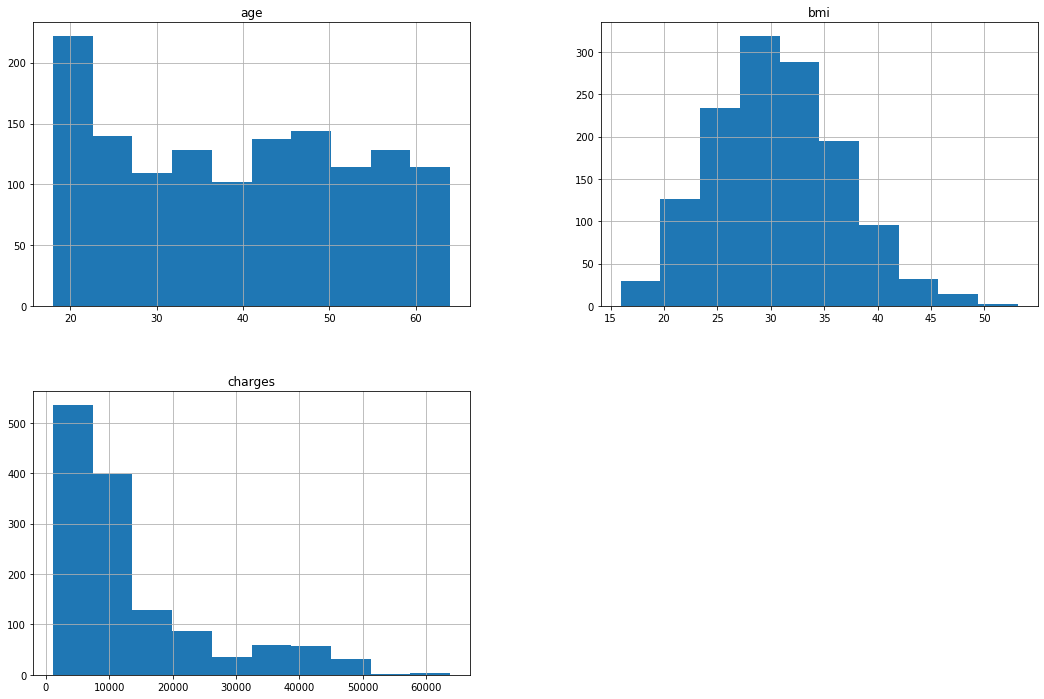

In [0]:
Data.hist(column=['age','bmi','charges'],figsize=(18,12))

# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

**Analysis**

Here we are using the Skew method to get the skewness of each attribute


1.   The Skewness of age attribute is the least and is very close to zero -Since it is still positive it's still a little skewed to the right but mostly the mean and median would be approximately close to each other   
2.   Similarly the skewness of BMI attribute is also closer to 0 and a bit skewed to the right so the mean and median would be close to each other - but mean would be a bit higher than the median
3.   The skewness for charges is very high - as expected from the histogram or the frequency plot we saw earlier. The distribution is right or positive skewed and mean would be significantly higher than the median 



In [0]:
Data[['age','bmi','charges']].skew()

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

# Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

We would use the Inter Quartile reange to find out the outliers in the three coulmns 

In [0]:

from scipy import stats
import numpy as np
bmi_outliers = np.abs(stats.zscore(Data['bmi']))
age_outliers = np.abs(stats.zscore(Data['age']))
charges_outliers = np.abs(stats.zscore(Data['charges']))
print(' The data points which are BMI outliers are ')
print(np.where(bmi_outliers>3))
print(' The data points which are age outliers are ')
print(np.where(age_outliers>3))
print (' The data points which are Charges outliers are ')
print(np.where(charges_outliers>3))

 The data points which are BMI outliers are 
(array([ 116,  847, 1047, 1317]),)
 The data points which are age outliers are 
(array([], dtype=int64),)
 The data points which are Charges outliers are 
(array([  34,  543,  577,  819, 1146, 1230, 1300]),)


# Distribution of categorical columns (include children)

Here we would plot a coutplot for the categotrical variables so that we can see the distribution between different classes . It is more of a frequency plot for different categories which reside in each categorical attribute

**Analysis**

Looking at the distribution of frequency of categorical variables we can see that Sex and Region are almost equally distributed, i.e. There is an almost equal class representation 

However in case of Smoker attribute it can be seen that the number of people who smoke is rather low than those who don't 
Also mostly people prefer less than or equal to 1 children and a majority of them have no children at all


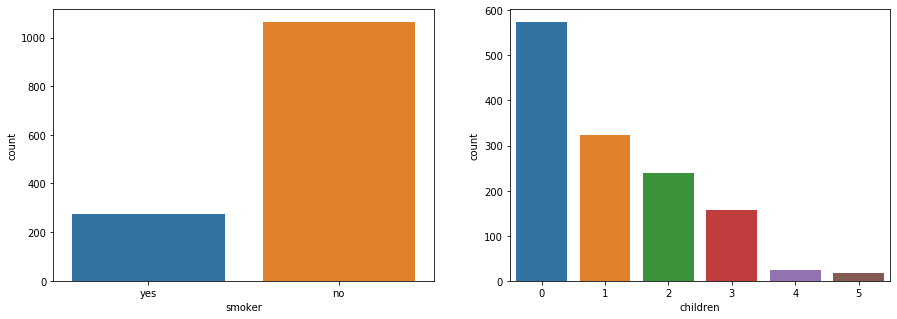

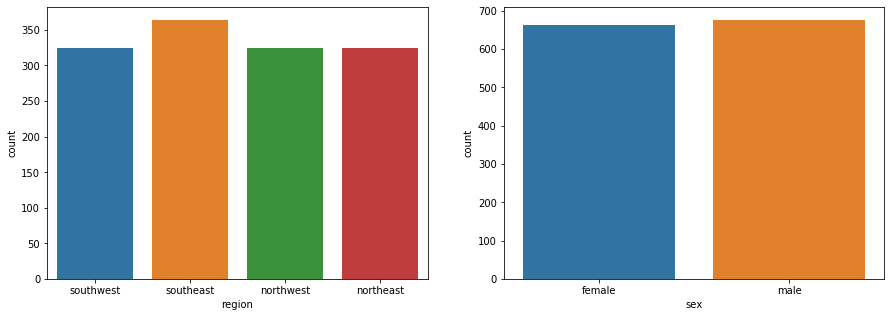

In [0]:
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
sns.countplot(data=Data,x='smoker')
plt.subplot(1,2,2)
sns.countplot(data=Data,x='children')
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
sns.countplot(data=Data,x='region')
plt.subplot(1,2,2)
sns.countplot(data=Data,x='sex')

# Pair plot that includes all the columns of the data frame

Here we are using Seaborn Pairplot to plot the relationship between all the attributes - A total of 49 charts are shown here with the diagonal showing the histogram plot( frequency distribution of each attribute)

**A key takeaway from these charts is the distribution between Smoker attribute and Charges - It seems like the charges are on a higher end if one is a smoker. We would have to use more statistical techniques to see if there is a statistical significance**



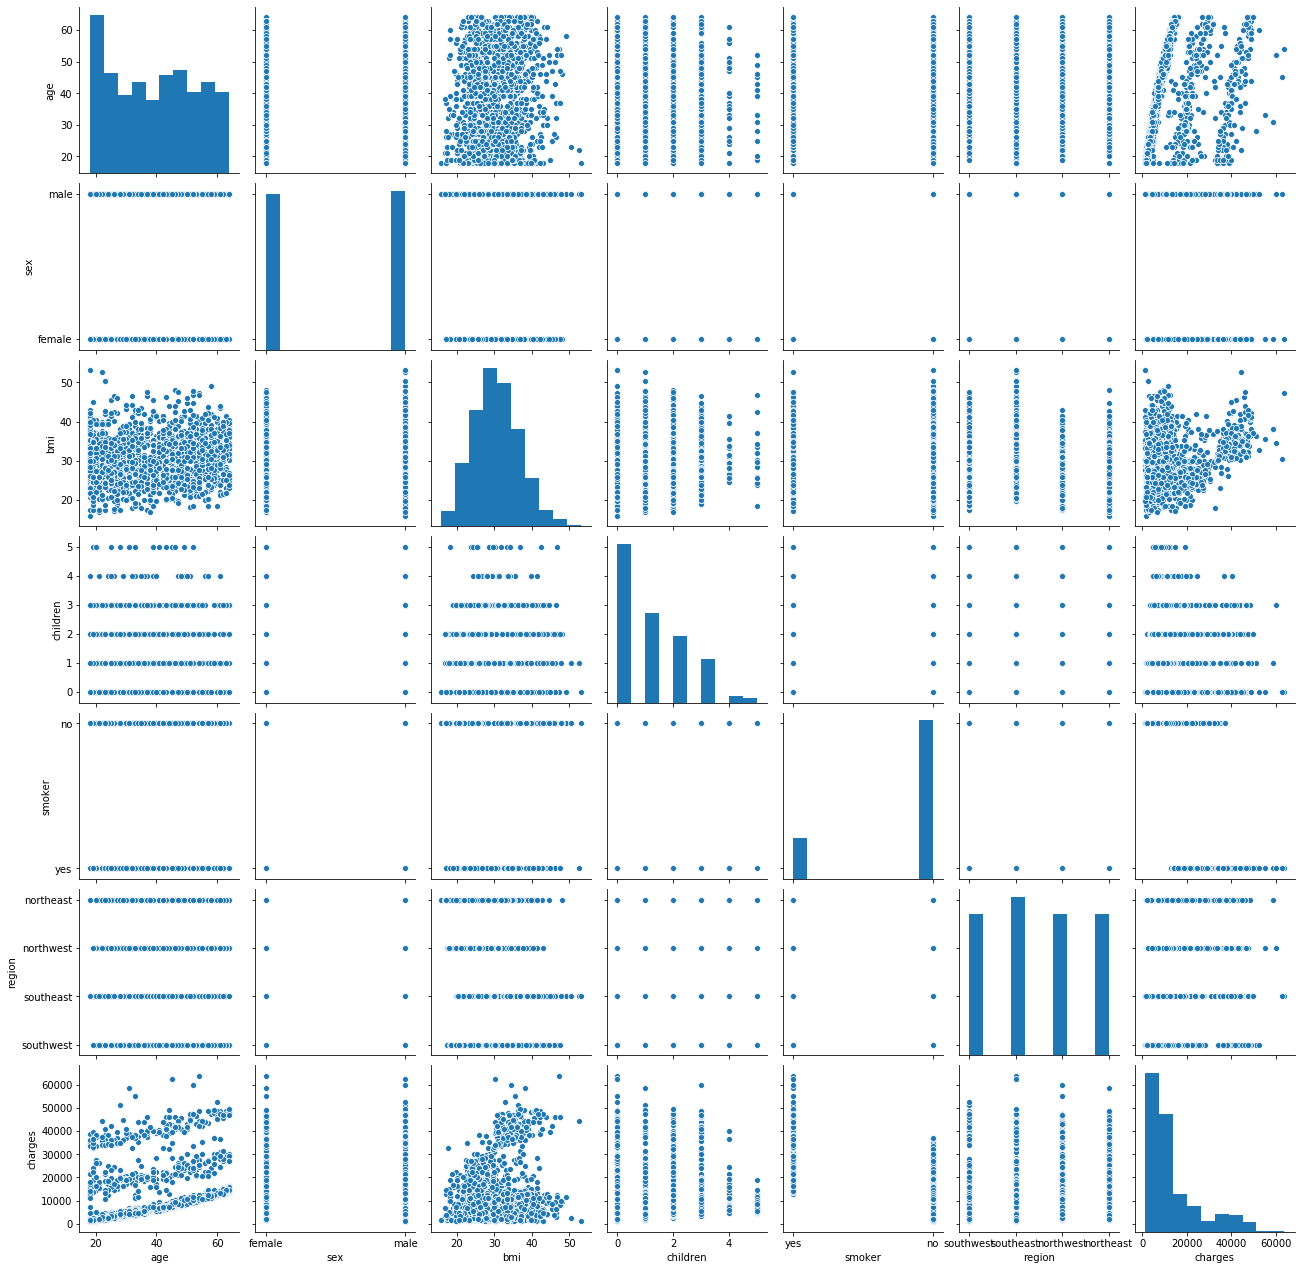

In [0]:
import seaborn as sns 
sns.pairplot(Data,vars=['age',	'sex',	'bmi',	'children',	'smoker',	'region',	'charges'])

# Do charges of people who smoke differ significantly from the people who don't ?

This question can be answered by using two sample T-test - Since here we are asked to find whether the mean of one sample is different from the other and not whether it is greater or lower therefore it is two sided t-test

**Hypothesis Formulation**

**Null Hypothesis** - The two groups have the same mean

**Alternate Hypothesis** - The two groups have different means

We would use a significance level of 5% to ascertain whether to reject or fail to reject the null hypothesis

**Analysis**

The p value is very low and is much much lower than the 0.05 which shows that there is a significant difference between means of two groups

Hence **we reject the Null Hypothesis**

***This shows that the charges for people who smoke differ significantly than the people who don't***





In [0]:

X=Data[Data['smoker'] == 'yes']['charges'] # Group 1 
Y=Data[Data['smoker'] == 'no']['charges'] # Group 2
t_statistic, p_value = ttest_ind(X, Y) # Two sample t-test 
print(t_statistic, p_value)

print ("two-sample t-test p-value=", p_value)
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level


46.664921172723716 8.271435842177219e-283
two-sample t-test p-value= 8.271435842177219e-283


# Does bmi of males differ significantly from that of females?

This question can be answered by using two sample t-test - Since here we are asked to find whether the mean of one sample is different from the other and not whether it is greater or lower therefore it is two sided t-test

Hypothesis Formulation

**Null Hypothesis** - The two groups have the same mean

**Alternate Hypothesis** - The two groups have different means

We would use a significance level of 5% to ascertain whether to reject or fail to reject the null hypothesis

**Analysis**

The p value is higher than  0.05 which shows that there is no significant difference between means of two groups

**Hence we fail to reject the Null Hypothesis**

***This shows that bmi of males does not differ significantly to those of the females***

In [0]:
A=Data[Data['sex'] == 'male']['bmi'] # Group 1 
B=Data[Data['sex'] == 'female']['bmi'] # Group 2
t_statistic, p_value = ttest_ind(X, Y) # Two sample t-test 
print(t_statistic, p_value)

print ("two-sample t-test p-value=", p_value)
if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(p_value,4)} the difference is not significant. aka |We fail to reject the null|')
# p_value > 0.05 => Null Hypothesis:
# they have the same mean at the 5% significance level

1.696752635752224 0.08997637178984932
two-sample t-test p-value= 0.08997637178984932
With a p-value of 0.09 the difference is not significant. aka |We fail to reject the null|


# Is the proportion of smokers significantly different in different genders?



*   'sex' and 'smoker' are two categorical variables
*   We want to see if the proportion of smokers in the female population is significantly less than it is in the male population

**We would use a Z-test of proportion**

**Ho = The proportions are equal**

**Ha = The two proportions are not equal**


**Analysis**


The p value is very low and is much much lower than the 0.05 which shows that there is a significant difference between means of two groups

Hence **we reject the Null Hypothesis**

***This shows there is a statistically significant difference between the proportion of male smokers and female smokers***


In [0]:
female_smokers = Data[Data['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = Data[Data['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = Data.sex.value_counts()[1] # number of females in the data
n_males = Data.sex.value_counts()[0] #number of males in the data
print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively
With a p-value of 0.0053 the difference is significant. aka |We reject the null|


# Is the distribution of bmi across women with no children, one child and two children, the same?

**Firstly append the data and create a dataframe and then plot a boxplot to visualize **

The boxplots show almost dissimilar shapes, location and spreads and there are very few outliers.


### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the BMIs of mothers with 0,1 and 2 children respectively

Significance level is decided at 0.05

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

In this example, p value is 0.715858 and it is greater than our chosen level of signifance at 5%

So the statistical decision is tat we would not be able to reject the null hypothesis at 5% level of significance.

### So the BMI for mothers with 0,1, and 2 children does not vary significantly.

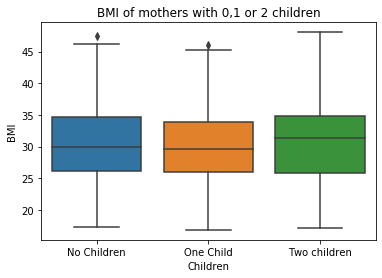

                sum_sq     df         F    PR(>F)
Children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


In [0]:
No_child_mother=Data[(Data['sex'] == 'female') & (Data['children']==0)]['bmi'] # Group 1 
One_child_mother=Data[(Data['sex'] == 'female') & (Data['children']==1)]['bmi'] # Group 2 
Two_child_mother=Data[(Data['sex'] == 'female') & (Data['children']==2)]['bmi'] # Group 3

Anova_test = pd.DataFrame()
df1     = pd.DataFrame({'Children': 'No Children', 'BMI':No_child_mother})
df2     = pd.DataFrame({'Children': 'One Child', 'BMI':One_child_mother})
df3     = pd.DataFrame({'Children': 'Two children', 'BMI':Two_child_mother})

Anova_test = Anova_test.append(df1) 
Anova_test = Anova_test.append(df2) 
Anova_test = Anova_test.append(df3) 

sns.boxplot(x = "Children", y = "BMI", data = Anova_test)
plt.title('BMI of mothers with 0,1 or 2 children')
plt.show()

import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('BMI ~ Children', data = Anova_test).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)


In [0]:
print('With a p-value of 0.72 the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.72 the difference is not significant. aka |We fail to reject the null|
